In [9]:
import pandas as pd

import os

import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import anndata as ad
import glob
from sklearn.metrics import adjusted_rand_score

import warnings
warnings.filterwarnings("ignore")

import matplotlib
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42


In [10]:
import json

# Load configuration
with open("../../config/config_notebooks_TNBC.json", "r") as config_file:
    config = json.load(config_file)


In [11]:
## Try to plot the bootstrapped ARI patient values
df_boot = pd.DataFrame()
for model_type, names, benchmark_path in zip([config['retrained_model_list1_type'],
                                              config['retrained_model_list2_type']],
                                             [config['retrained_model_list1'],
                                              config['retrained_model_list2']],
                                             [config['retrained_benchmark_folder1'],
                                              config['retrained_benchmark_folder2']]):
    path_to_unsupervised_clustering = os.path.join(benchmark_path, "unsupervised_clustering_ARI", "kmeans")
    
    for name in names:
        print(f"Processing {name}...")
        bootstrapped_files = glob.glob(os.path.join(path_to_unsupervised_clustering, f"boostraped_ARI_patient_{name}_10*.json"))
        print(f"Found bootstrapped files: {bootstrapped_files}")
        if len(bootstrapped_files) > 0:
            with open(bootstrapped_files[0], "r") as f:
                ari_patient = json.load(f)
                
                df_boot[name] = ari_patient[name]


Processing uni...
Found bootstrapped files: ['../../results/TNBC/benchmark/uni_explora_models/unsupervised_clustering_ARI/kmeans/boostraped_ARI_patient_uni_10_19_patients.json', '../../results/TNBC/benchmark/uni_explora_models/unsupervised_clustering_ARI/kmeans/boostraped_ARI_patient_uni_10_patients_old.json']
Processing uni_explora_kde_4096_prototypes...
Found bootstrapped files: ['../../results/TNBC/benchmark/uni_explora_models/unsupervised_clustering_ARI/kmeans/boostraped_ARI_patient_uni_explora_kde_4096_prototypes_10_patients_old.json', '../../results/TNBC/benchmark/uni_explora_models/unsupervised_clustering_ARI/kmeans/boostraped_ARI_patient_uni_explora_kde_4096_prototypes_10_19_patients.json']
Processing uni_explora_kde_16384_prototypes...
Found bootstrapped files: ['../../results/TNBC/benchmark/uni_explora_models/unsupervised_clustering_ARI/kmeans/boostraped_ARI_patient_uni_explora_kde_16384_prototypes_10_patients_old.json', '../../results/TNBC/benchmark/uni_explora_models/unsupe

In [12]:
df_boot.mean()

uni                                   0.342942
uni_explora_kde_4096_prototypes       0.282749
uni_explora_kde_16384_prototypes      0.241233
uni_explora_kde_65536_prototypes      0.308185
uni_explora_koleo_4096_prototypes     0.326328
uni_explora_koleo_16384_prototypes    0.266211
uni_explora_koleo_65536_prototypes    0.259505
uni_full_kde_4096_prototypes          0.159616
uni_full_kde_16384_prototypes         0.147547
uni_full_kde_65536_prototypes         0.129415
uni_full_koleo_4096_prototypes        0.160805
uni_full_koleo_16384_prototypes       0.152941
uni_full_koleo_65536_prototypes       0.122024
dtype: float64

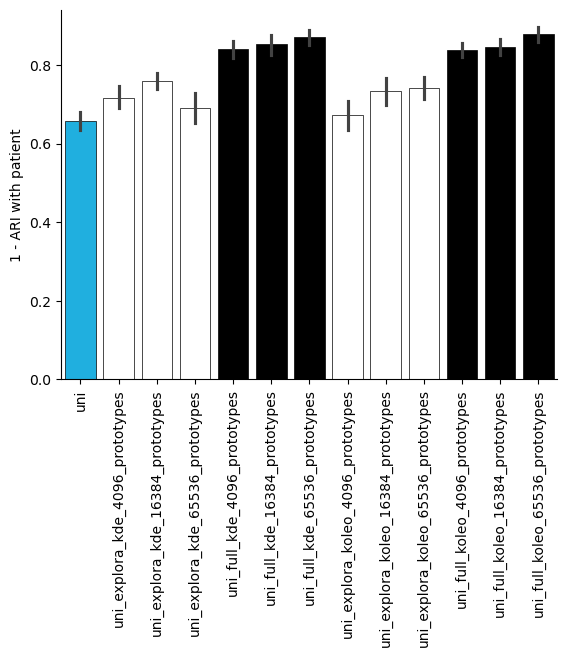

In [13]:
import sys
sys.path.append("../../")
from digitalhistopathology.notebooks_utils import sort_retrained_models

retrained_models = config['retrained_model_list1'] + config['retrained_model_list2']
sorted_retrained_models = sort_retrained_models(retrained_models)

palette = []
for model in sorted_retrained_models:
    if "explora" in model:
        palette.append("white")
    elif "full" in model:
        palette.append("black")
    else:
        palette.append("deepskyblue")

if len(df_boot) > 0:
  df_boot = df_boot.T.loc[sorted_retrained_models].T
  
  df_boot = 1 - df_boot
  
  sns.barplot(data=df_boot, 
              palette=palette,
            linewidth=0.5,
            edgecolor="black",
            )
  plt.ylabel("1 - ARI with patient")
  plt.xticks(rotation=90)
  sns.despine()